___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [6]:
df.isnull().sum().any()

False

In [7]:
df = df.drop('RowNumber', axis = 1) # This column is not helpfull for analysis.

In [8]:
df = df.drop('Surname', axis = 1) # This column is not helpful for analysis.

In [71]:
df = df.drop('CustomerId', axis = 1)

In [73]:
df["Geography"].value_counts()

1    5014
2    2509
3    2477
Name: Geography, dtype: int64

In [74]:
def Country (x):
    if x == "France":
        return 1
    elif x =="Germany":
        return 2
    else:
        return 3

In [75]:
df["Geography"] = df.Geography.apply(Country)

In [76]:
df["Geography"].value_counts()

3    10000
Name: Geography, dtype: int64

In [77]:
df["Gender"] = df.Gender.apply(lambda x : 0 if x == "Female" else 1)

In [78]:
df.Gender

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Gender, Length: 10000, dtype: int64

In [79]:
df.shape

(10000, 11)

In [80]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,3,1,42,2,0.000,1,1,1,101348.880,1
1,608,3,1,41,1,83807.860,1,0,1,112542.580,0
2,502,3,1,42,8,159660.800,3,1,0,113931.570,1
3,699,3,1,39,1,0.000,2,0,0,93826.630,0
4,850,3,1,43,2,125510.820,1,1,1,79084.100,0


In [81]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,NaN,NaN,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Geography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.004,NaN,NaN,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,NaN,NaN,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,NaN,NaN,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,NaN,NaN,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,NaN,NaN,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,NaN,NaN,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,NaN,NaN,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


<AxesSubplot:>

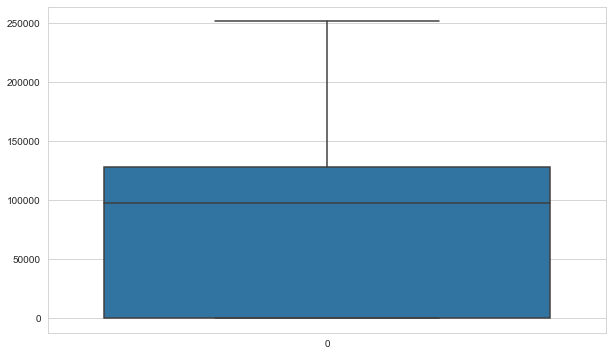

In [82]:
sns.boxplot(data=df["Balance"])

<AxesSubplot:>

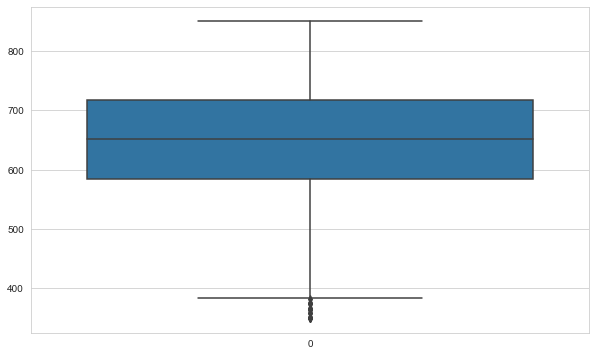

In [83]:
sns.boxplot(data=df["CreditScore"])

<AxesSubplot:>

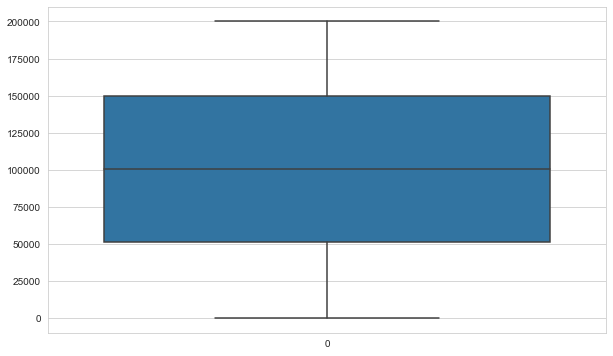

In [84]:
sns.boxplot(data=df["EstimatedSalary"])

# Preprocessing of Data
- Train | Test Split, Scalling

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [87]:
seed = 101

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [89]:
X_train.shape

(7000, 10)

In [90]:
X_test.shape

(3000, 10)

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [94]:
import tensorflow as tf

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [98]:
tf.random.set_seed(seed)

tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(15, activation = 'sigmoid', input_dim = X_train.shape[1])) 
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(5, activation = 'sigmoid'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [99]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 15) dtype=float32, numpy=
 array([[ 0.19575772,  0.16454306, -0.14943665, -0.28060743, -0.01344272,
          0.08694485, -0.24747911,  0.30144343, -0.08441624, -0.4214076 ,
         -0.07758772, -0.18723151,  0.2653474 ,  0.02079555,  0.48533222],
        [ 0.21446851,  0.17790559, -0.3730223 , -0.22606474, -0.03686371,
          0.08417401,  0.17751029,  0.39763162,  0.10467157,  0.26247832,
          0.18417671, -0.33919668, -0.23846397,  0.3860291 ,  0.32309535],
        [ 0.26947048,  0.40360287, -0.37988997, -0.17586002,  0.13810828,
          0.4473773 ,  0.43441013,  0.33481994,  0.4045175 ,  0.30771664,
         -0.18220651, -0.4362782 , -0.46288309, -0.13089758, -0.39585102],
        [-0.11544052,  0.33261648,  0.4674501 ,  0.00088769, -0.4705396 ,
          0.06706783,  0.19516733,  0.12248746,  0.08410248, -0.25491884,
         -0.2073654 ,  0.2597774 , -0.48348954, -0.25931138,  0.23717263],
        [ 0.39639613,  0.20765272,  0.43

In [101]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 55, epochs = 600)

Epoch 1/600
109/109 [==============================] - 1s 4ms/step - loss: 0.5114 - accuracy: 0.7943 - val_loss: 0.4757 - val_accuracy: 0.8181
Epoch 2/600
109/109 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7943 - val_loss: 0.4742 - val_accuracy: 0.8181
Epoch 3/600
109/109 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7943 - val_loss: 0.4691 - val_accuracy: 0.8181
Epoch 4/600
109/109 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7943 - val_loss: 0.4681 - val_accuracy: 0.8181
Epoch 5/600
109/109 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7943 - val_loss: 0.4625 - val_accuracy: 0.8181
Epoch 6/600
109/109 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7943 - val_loss: 0.4590 - val_accuracy: 0.8181
Epoch 7/600
109/109 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7943 - val_loss: 0.4613 - val_accuracy: 0.8181

In [102]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 15) dtype=float32, numpy=
 array([[ 4.14181054e-01, -3.62968049e-03, -2.38149598e-01,
         -1.20092817e-01,  5.21996617e-01, -9.49451774e-02,
          1.18435891e-02, -3.05828685e-03, -5.84549233e-02,
         -2.15106994e-01, -1.84191778e-01, -5.94859049e-02,
          5.56178749e-01,  1.35402411e-01,  2.21296236e-01],
        [ 2.14468509e-01,  1.77905589e-01, -3.73022288e-01,
         -2.26064742e-01, -3.68637145e-02,  8.41740072e-02,
          1.77510291e-01,  3.97631615e-01,  1.04671568e-01,
          2.62478322e-01,  1.84176713e-01, -3.39196682e-01,
         -2.38463968e-01,  3.86029094e-01,  3.23095351e-01],
        [ 2.69470483e-01,  4.03602868e-01, -3.79889965e-01,
         -1.75860018e-01,  1.38108283e-01,  4.47377294e-01,
          4.34410125e-01,  3.34819943e-01,  4.04517502e-01,
          3.07716638e-01, -1.82206511e-01, -4.36278194e-01,
         -4.62883085e-01, -1.30897582e-01, -3.95851016e-01],
        [ 1.30990219e+00, -5.

In [103]:
model.history.history

{'loss': [0.5114372968673706,
  0.5087417364120483,
  0.506001889705658,
  0.5034289956092834,
  0.5001219511032104,
  0.49685904383659363,
  0.4923250079154968,
  0.48898249864578247,
  0.4852356016635895,
  0.4814002513885498,
  0.47841694951057434,
  0.4764477014541626,
  0.47414958477020264,
  0.4723721444606781,
  0.47142529487609863,
  0.4710880517959595,
  0.47349822521209717,
  0.4710537791252136,
  0.4713381230831146,
  0.4723007380962372,
  0.47089964151382446,
  0.469964861869812,
  0.4698926508426666,
  0.46723639965057373,
  0.4669361710548401,
  0.46934524178504944,
  0.4643303453922272,
  0.46782952547073364,
  0.4625318944454193,
  0.47077783942222595,
  0.4653518795967102,
  0.4672107696533203,
  0.48099637031555176,
  0.46491530537605286,
  0.46896061301231384,
  0.472432017326355,
  0.468790739774704,
  0.46912407875061035,
  0.46479541063308716,
  0.4684438705444336,
  0.46490636467933655,
  0.47581014037132263,
  0.46908485889434814,
  0.4652537405490875,
  0.46196

In [104]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.511,0.794,0.476,0.818
1,0.509,0.794,0.474,0.818
2,0.506,0.794,0.469,0.818
3,0.503,0.794,0.468,0.818
4,0.500,0.794,0.462,0.818
...,...,...,...,...
595,0.400,0.854,0.393,0.857
596,0.398,0.854,0.385,0.856
597,0.407,0.854,0.399,0.853
598,0.402,0.854,0.391,0.858


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

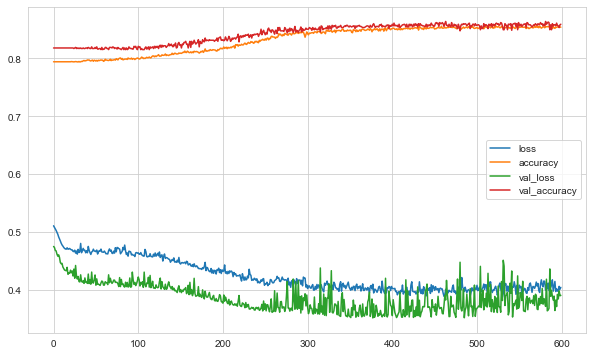

In [105]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

Loss and val_loss values have been decreasing together.

In [106]:
model.evaluate(X_test, y_test, verbose=0)

[0.3982328772544861, 0.8536666631698608]

In [107]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [108]:
eval_metric(y_test, y_pred)

r2_score: 0.2704512388417539 
mae: 0.2685279234250387 
mse: 0.11989858282326 
rmse: 0.3462637474863056


In [109]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [111]:
#plot_roc_curve(model, X_test, y_test);

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___